# Lab Chapter 5

# Validation set approach

#### Get training data

In [1]:
library(ISLR)
set.seed(1)
train = sample(392,196)

Warning message:
“package ‘ISLR’ was built under R version 3.4.4”

#### Fit linear model with subset of the data

In [2]:
attach(Auto)
lm_1 = lm(mpg ~ horsepower, data = Auto, subset = train)

#### Calculate MSE of 196 observations in the validation set

In [3]:
# Predictions using linear fit from subset of data
predictions = predict(lm_1, Auto)

# MSE for test data
mean((mpg - predict(lm_1, Auto))[-train]**2)

[1] 26.14142

#### In this approach, the test estimate MSE is highly dependent on what training data we start with

In [4]:
set.seed(2)
train = sample(392,196)

lm_2 = lm(mpg ~ horsepower, data = Auto, subset = train)
mean((mpg - predict(lm_2, Auto))[-train]**2)

[1] 23.29559

Note that the **glm()** function without specifying the family is the same as using **lm()**.

# Leave one out cross validation (LOOCV)
This technique has low bias but high variance.

In [5]:
library(boot)

glm_1 = glm(mpg ~ horsepower, data = Auto)
cv_error = cv.glm(Auto, glm_1)

Warning message:
“package ‘boot’ was built under R version 3.4.4”

Get the LOOCV estimated MSE:

In [6]:
cv_error$delta

[1] 24.23151 24.23114

LOOCV for polynomials:

In [7]:
cv_error = c()

# Cross validate for polynomials from 1:5
for (i in 1:5) {
    glm_fit = glm(mpg ~ poly(horsepower, i), data = Auto)
    cv_error[i] = cv.glm(Auto, glm_fit)$delta[1]
}

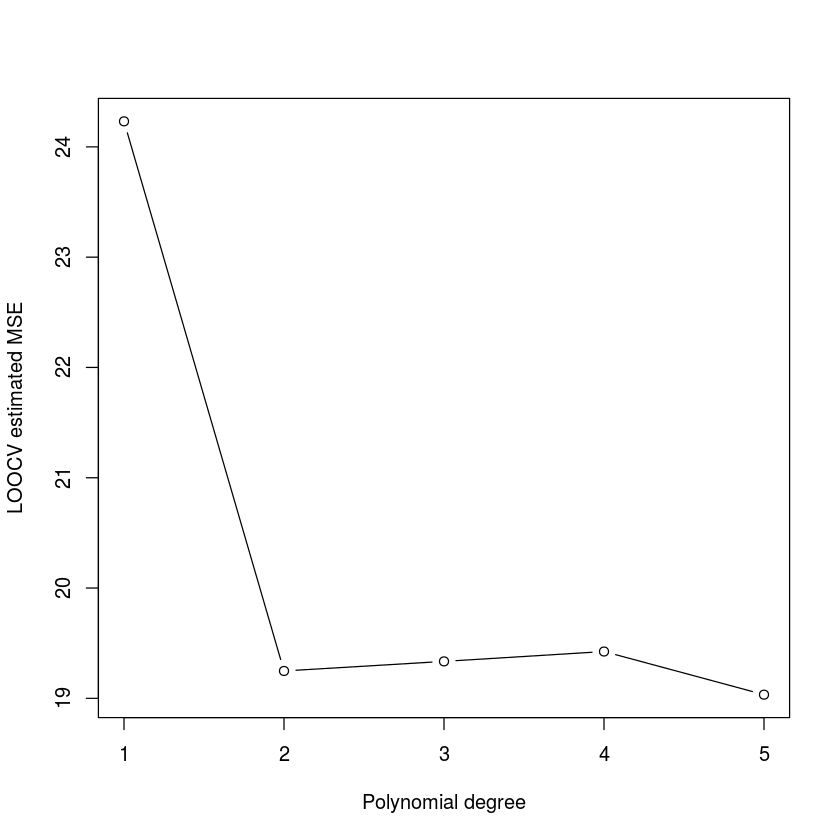

In [8]:
plot(1:5, cv_error, type = "b",
     xlab = "Polynomial degree", ylab = "LOOCV estimated MSE")

# K-Fold cross validation

In [9]:
set.seed(17)

cv_error = c()

for (i in 1:10) {
    glm_fit = glm(mpg ~ poly(horsepower, i), data = Auto)
    cv_error[i] = cv.glm(Auto, glm_fit, K = 10)$delta[1]
}

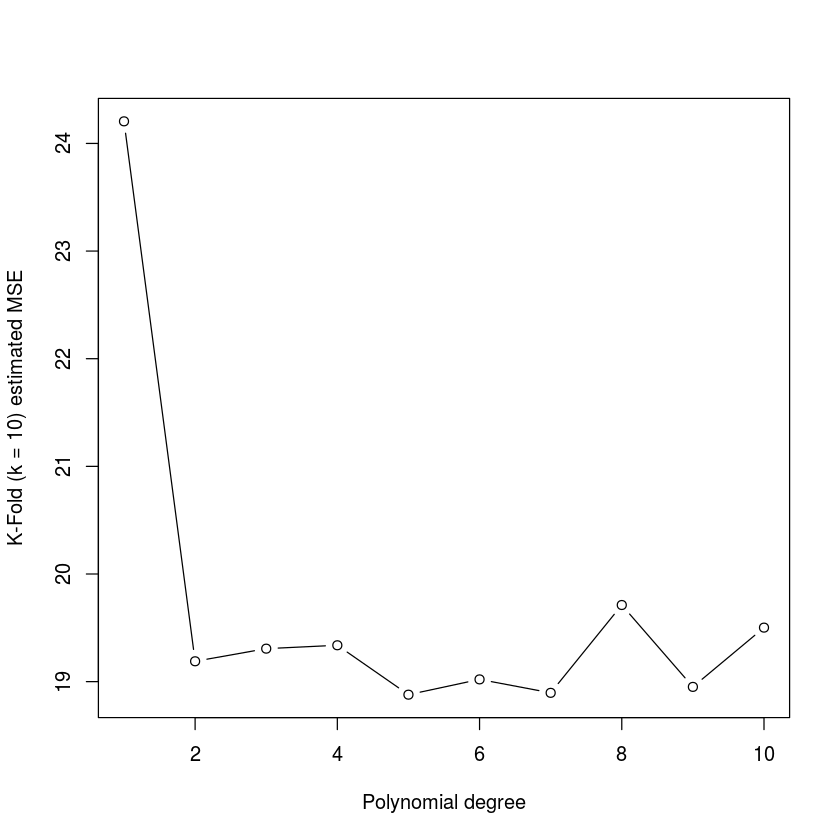

In [10]:
plot(1:10, cv_error, type = "b",
     xlab = "Polynomial degree", 
     ylab = "K-Fold (k = 10) estimated MSE")

The second delta refers to the biased corrected version.

# Bootstrap

In [11]:
alpha_fn = function(data, index) {
    X = data$X[index]
    Y = data$Y[index]
    return((var(Y) - cov(X,Y)) / var(X) + var(Y) - 2*cov(X,Y))
}

In [12]:
alpha_fn(Portfolio, 1:100)

[1] 0.6596797

Now construct a bootstrap dataset using sample:

In [13]:
set.seed(1)
alpha_fn(Portfolio, sample(100,100, replace = T))

[1] 0.8660514

In [14]:
boot(Portfolio, alpha_fn, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha_fn, R = 1000)


Bootstrap Statistics :
     original     bias    std. error
t1* 0.6596797 0.01211578   0.3073555

The final output shows that using the original data, ˆα = 0.5758, and that
the bootstrap estimate for SE(ˆα) is 0.0886.

### Estimating accuracy of linear regression models

In [15]:
boot_fn = function(data, index) {
    return(coef(lm(mpg ~ horsepower, data = data, subset = index)))
}

boot_fn(Auto, 1:392)

(Intercept)  horsepower 
 39.9358610  -0.1578447

Now we can use the sample function to create bootstrap estimates for the intercept and slope terms by randomly sampling from among the observations with replacement.

In [16]:
set.seed(1)

boot_fn(Auto, sample(392,392, replace = T))

(Intercept)  horsepower 
 38.7387134  -0.1481952

Now we use the **boot()** function to compute the standard errors of 1000 bootstrap estimates for the intercept and slope terms.

In [17]:
boot(Auto, boot_fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot_fn, R = 1000)


Bootstrap Statistics :
      original        bias    std. error
t1* 39.9358610  0.0296667441 0.860440524
t2* -0.1578447 -0.0003113047 0.007411218

In [18]:
summary(lm(mpg ~ horsepower, data = Auto))


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


# Applied Questions

In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.

- Fit a logistic regression model that uses income and balance to
predict default.

In [19]:
attach(Default)

glm_1 = glm(default ~ income + balance, 
            family = "binomial")

- Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:

i. Split the sample set into a training set and a validation set.
5.4 Exercises 199

ii. Fit a multiple logistic regression model using only the training
observations.

iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.

iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassified.